In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image,ImageOps
from openpyxl import load_workbook

In [2]:
def plot(pic):            #定義畫圖function
    plt.figure(figsize=(5,5))
    plt.imshow(pic, cmap='gray')
    plt.axis('off')
    plt.show()

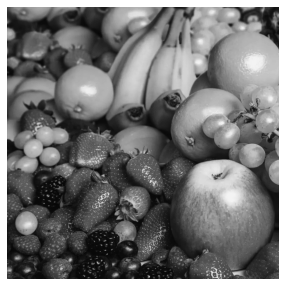

In [3]:
# open the image pic
pic = cv2.imread('./fruit.tif',0)
plot(pic)

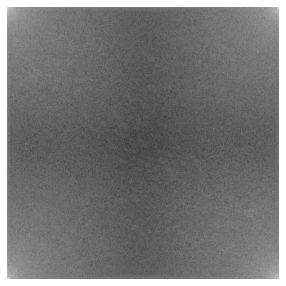

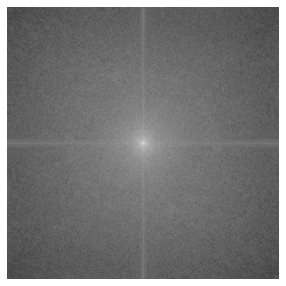

In [4]:
# (b)transform image to frequency domain --> F
B = np.fft.fft2(pic)
Bshift = np.fft.fftshift(B)  #將低頻分量移動到頻域圖像的中心

plot(np.log1p(np.abs(B)))
plot(np.log1p(np.abs(Bshift)))
b = np.uint8(cv2.normalize(np.log1p(np.abs(Bshift)), None, alpha=0,beta=255, norm_type=cv2.NORM_MINMAX))
b = Image.fromarray(b)
b.save('output/(b).tif',dpi=(150.0,150.0))

In [5]:
#將右邊及下方padding
def padding(img,M,N):
    pad_img = np.zeros((M,N))
    for m in range(600):
        for n in range(600):
            pad_img[m,n] = pic[m,n]
    
    return pad_img

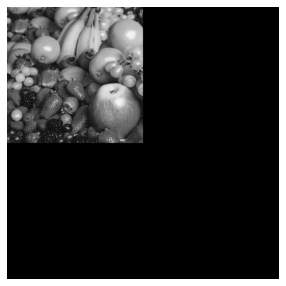

In [6]:
pad_img = padding(pic,1200,1200)
plot(pad_img)

(1200, 1200)


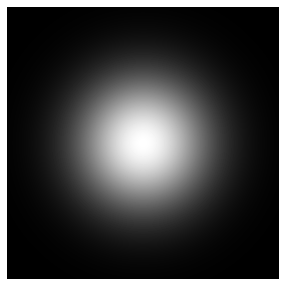

In [7]:
# Create Gaussin Filter: Low Pass Filter
M,N = 1200,1200
L = np.zeros((M,N), dtype=np.float32)
D0 = 200
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        L[u,v] = np.exp(-D**2/(2*D0*D0))
print(L.shape)

plot(L)
b = np.uint8(cv2.normalize(L, None, alpha=0,beta=255, norm_type=cv2.NORM_MINMAX))
b = Image.fromarray(b)
b.save('output/(c)L.tif',dpi=(150.0,150.0))

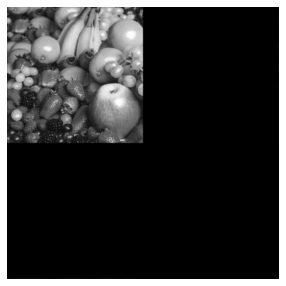

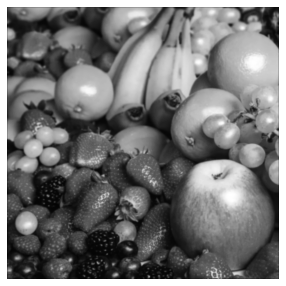

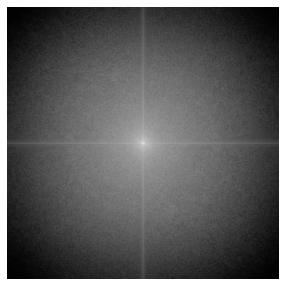

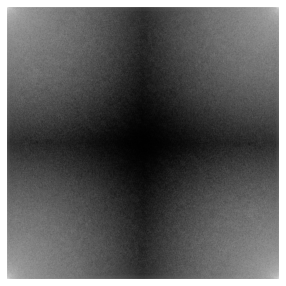

In [8]:
# Image Filters
F = np.fft.fft2(pad_img)
Fshift = np.fft.fftshift(F)
Gshift = Fshift * L
G = np.fft.ifftshift(Gshift)  # 將低頻逆轉換回圖像四角
g = np.abs(np.fft.ifft2(G))

plot(g)
plot(g[0:600,0:600])
b = np.uint8(cv2.normalize(g[0:600,0:600], None, alpha=0,beta=255, norm_type=cv2.NORM_MINMAX))
b = Image.fromarray(b)
b.save('output/(d)GLPF.tif',dpi=(150.0,150.0))
plot(np.log1p(np.abs(Gshift)))
plot(np.log1p(np.abs(G)))

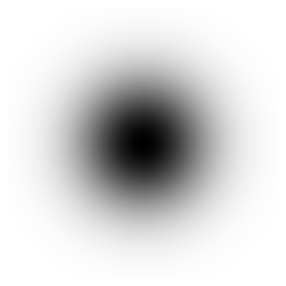

In [9]:
# Gaussian: High pass filter
HPF = 1 - L

plot(HPF)
b = np.uint8(cv2.normalize(HPF, None, alpha=0,beta=255, norm_type=cv2.NORM_MINMAX))
b = Image.fromarray(b)
b.save('output/(c)H.tif',dpi=(150.0,150.0))

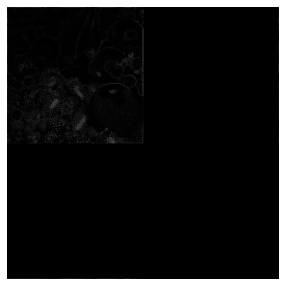

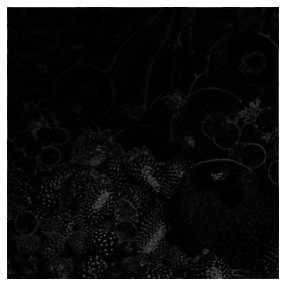

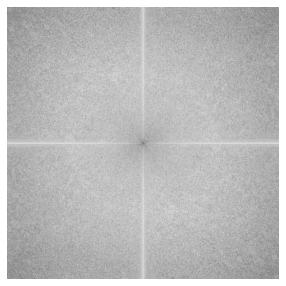

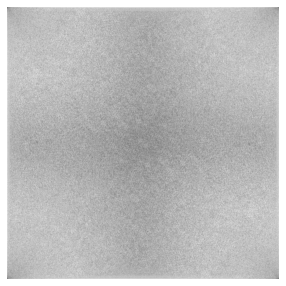

In [10]:
# Image Filters
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(g[0:600,0:600], cmap='gray')
plt.axis('off')
plt.show()
b = np.uint8(cv2.normalize(g[0:600,0:600], None, alpha=0,beta=255, norm_type=cv2.NORM_MINMAX))
b = Image.fromarray(b)
b.save('output/(d)GHPF.tif',dpi=(150.0,150.0))

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

In [11]:
v = np.array((25,2))
B = np.log1p(np.abs(Bshift))
C = B[0:600,0:300]         #(0<=u<=M-1, 0<=N/2-1) 
# print(C.shape)   
wb = load_workbook("freq.xlsx")
print(wb.sheetnames)
sheet = wb.worksheets[0]  #抓出列數


max_freq = []
for i in range(25):
    max_index = np.unravel_index(np.argmax(C, axis=None), C.shape)
    print(max_index,C[max_index])
    sheet.cell(row = i+1, column = 1, value = max_index[0])
    sheet.cell(row = i+1, column = 2, value = max_index[1])

    C[max_index] = 0
wb.save("freq.xlsx")

['工作表1']
(300, 299) 15.353577307778478
(301, 297) 14.756350783695932
(300, 298) 14.721760514672448
(296, 299) 14.484905633512964
(303, 297) 14.469717611024945
(300, 297) 14.448919413824159
(299, 299) 14.444281420070455
(295, 299) 14.430245895026484
(302, 297) 14.404972694891347
(297, 298) 14.343041797670216
(301, 294) 14.324250236514734
(298, 299) 14.309212009347334
(300, 295) 14.289457865350117
(302, 299) 14.259705636321957
(304, 299) 14.241070750814952
(303, 299) 14.189176842344153
(296, 294) 14.138615816833996
(299, 298) 14.084588300276138
(303, 298) 14.084443176574698
(299, 296) 13.962813230033012
(296, 296) 13.934698185353705
(306, 299) 13.902921829988436
(297, 296) 13.872251886280095
(299, 297) 13.825278324332334
(302, 295) 13.792314659576203
